✅ Scaled portfolio data loaded

First 5 rows of scaled data:
Ticker            Company  MarketCap  Revenues_M  Profits_M  ExpectedReturn
   WMT            Walmart   0.150380    1.000000   0.157649        0.096455
  AMZN             Amazon   0.555158    0.846178   0.311824        0.022164
  AAPL              Apple   1.000000    0.444530   1.000000        0.092205
   UNH UnitedHealth Group   0.126420    0.420068   0.228668        0.211936
  BRKA Berkshire Hathaway   0.255971    0.405092   0.992019        0.540969

✅ QUBO matrix constructed

✅ QUBO solved (classical brute-force)

Selected stocks (1=selected, 0=not selected):
Ticker            Company  QUBO_Select
   WMT            Walmart            0
  AMZN             Amazon            0
  AAPL              Apple            0
   UNH UnitedHealth Group            0
  BRKA Berkshire Hathaway            1
   CVS         CVS Health            1
   XOM        Exxon Mobil            1
 GOOGL           Alphabet            0
   MCK           Mc

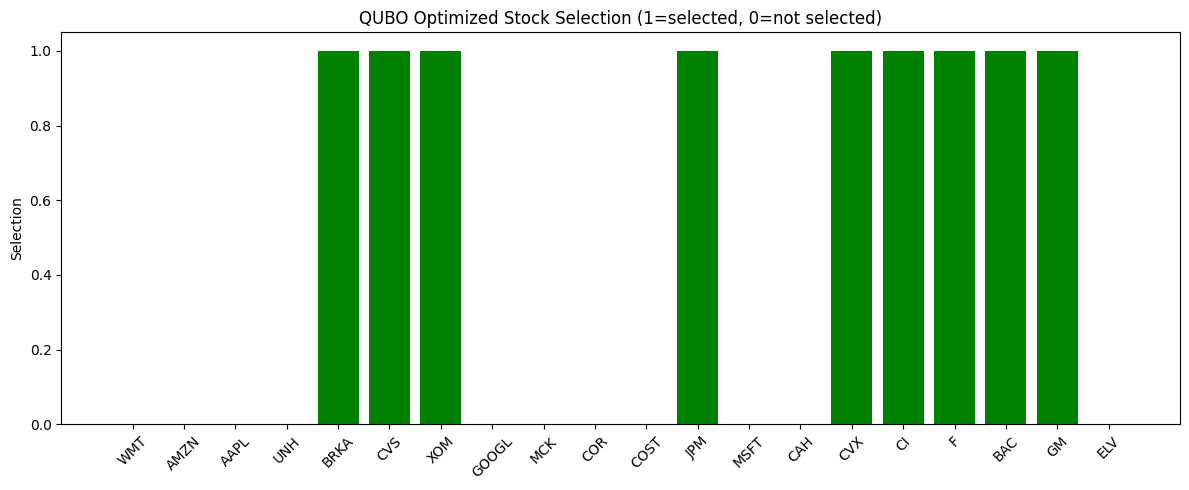

✅ Plot saved to: C:\Users\japes\OneDrive\Desktop\japesh\03_result\qubo_selection_plot.png


In [ ]:
# ==============================
# 03_qubo.py
# Quantum / QUBO Portfolio Optimization
# ==============================

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import product

# ------------------------------
# 1️⃣ Load scaled data from 02_feature
# ------------------------------
feature_folder = r"C:\Users\japes\OneDrive\Desktop\japesh\02_feature"
scaled_csv = os.path.join(feature_folder, "scaled_portfolio_data.csv")
cov_file = os.path.join(feature_folder, "cov_matrix_scaled.npy")

df = pd.read_csv(scaled_csv)
cov_matrix = np.load(cov_file)

tickers = df["Ticker"].tolist()
expected_returns = df["ExpectedReturn"].values
N = len(tickers)

print("✅ Scaled portfolio data loaded")
print("\nFirst 5 rows of scaled data:")
print(df.head().to_string(index=False))  # neat table

# ------------------------------
# 2️⃣ QUBO formulation
# ------------------------------
risk_aversion = 0.5  # tradeoff between return and risk

# QUBO matrix: Q = -returns + risk_aversion * cov
Q = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            Q[i, j] = -expected_returns[i] + risk_aversion * cov_matrix[i, j]
        else:
            Q[i, j] = risk_aversion * cov_matrix[i, j]

print("\n✅ QUBO matrix constructed")

# ------------------------------
# 3️⃣ Solve QUBO (classical brute-force demo)
# ------------------------------
best_obj = -np.inf
best_solution = None

# Binary selection: 1 = select stock, 0 = not select
for x in product([0, 1], repeat=N):
    x = np.array(x)
    obj = - x @ Q @ x  # maximize returns - risk
    if obj > best_obj:
        best_obj = obj
        best_solution = x

best_solution = np.array(best_solution)
df["QUBO_Select"] = best_solution

print("\n✅ QUBO solved (classical brute-force)")
print("\nSelected stocks (1=selected, 0=not selected):")
print(df[["Ticker", "Company", "QUBO_Select"]].to_string(index=False))

# ------------------------------
# 4️⃣ Store results in 03_result
# ------------------------------
results_folder = r"C:\Users\japes\OneDrive\Desktop\japesh\03_result"
os.makedirs(results_folder, exist_ok=True)

solution_csv = os.path.join(results_folder, "qubo_solution.csv")
df.to_csv(solution_csv, index=False)

print(f"\n✅ Optimized portfolio saved to: {solution_csv}")

# ------------------------------
# 5️⃣ Optional: visualize selection
# ------------------------------
plt.figure(figsize=(12,5))
plt.bar(df["Ticker"], df["QUBO_Select"], color='green')
plt.title("QUBO Optimized Stock Selection (1=selected, 0=not selected)")
plt.ylabel("Selection")
plt.xticks(rotation=45)
plt.tight_layout()

plot_file = os.path.join(results_folder, "qubo_selection_plot.png")
plt.savefig(plot_file)
plt.show()

print(f"✅ Plot saved to: {plot_file}")
